In [1]:
import numpy as np
import hypernetx as hnx
import matplotlib.pyplot as plt


In [184]:

# scenes = {
#     1: ('C', 'D', 'E', 'A'),
#     2: ('F', 'G', 'C', 'A'),
#     3: ("F", "D"),
#     4: ("A", "E"),
#     5: ("A"),
#     6: ("C"),
#     7: ("A","F","G"),
# }

scenes = {
    1: ('A', 'B'),
    2: ('C', 'D', 'A', 'B'),
    3: ("B"),
    4: ("A"),
    5: ("B","C","D"),
}

H = hnx.Hypergraph(scenes)

/Users/paulhosek/opt/anaconda3/envs/mcm_classifying/lib/python3.11/site-packages/hypernetx/classes/entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
/Users/paulhosek/opt/anaconda3/envs/mcm_classifying/lib/python3.11/site-packages/hypernetx/classes/hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
/Users/paulhosek/opt/anaconda3/envs/mcm_classifying/lib/python3.11/site-packages/hypernetx/classes/entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elem

/Users/paulhosek/opt/anaconda3/envs/mcm_classifying/lib/python3.11/site-packages/hypernetx/classes/entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
/Users/paulhosek/opt/anaconda3/envs/mcm_classifying/lib/python3.11/site-packages/hypernetx/classes/entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
/Users/paulhosek/opt/anaconda3/envs/mcm_classifying/lib/python3.11/site-packages/hypernetx/classes/entityset.py:1494: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties = props.combine_first(self.properties)
/Users/paulhosek/

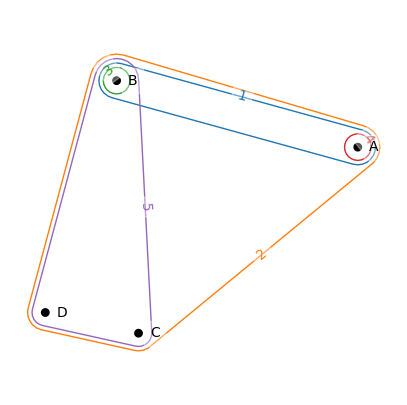

In [155]:
plt.subplots(figsize=(5,5))
hnx.draw(H)

## Now we that we have the graph, assign edge weights and generate observables from it.

In [156]:
# 1. Assign edge weights
seed = 0
edge_labels = list(H.edges())
rng = np.random.default_rng(seed)
edge_weights_Jij = rng.random(len(edge_labels))

In [157]:
# TODO: calculate parition function using all possible edges idk bru
node_labels = list(H.nodes) # Define: indices are spin indices here
nspin = len(node_labels)

In [144]:
allbits = gen_allbitstrings(nspin)
allbits[allbits == 0] = 0
edge_weights_Jij
# for every combination
# for every spin, multiply the spin value with the edge weights (edges may also only include own spin).
#   Sum over spins afterwards to get energy.



array([0.63696169, 0.26978671, 0.04097352, 0.01652764, 0.81327024])

In [145]:
state = allbits[2]
# 

{1: ['A', 'B'],
 2: ['C', 'D', 'A', 'B'],
 5: ['B'],
 6: ['A'],
 7: ['B', 'C', 'D']}

In [183]:
# for every interaction in the hypergraph, we multiply its value/weight with the states of the variables involved in that one
# that means we can broadcast every interaction over the involved spin variables in allbits

incm = H.incidence_matrix().toarray() # spin (rows) x link (cols)
weighted_incm = incm *edge_weights_Jij
energy = (allbits[:,:,None]*weighted_incm).sum(axis=2).sum(axis=1) # state spin values * interaction; sum over interactions
Z = np.sum(energy_maybe)
energy/Z



array([0.        , 0.02791164, 0.02791164, 0.05582328, 0.04538282,
       0.07329446, 0.07329446, 0.1012061 , 0.0237939 , 0.05170554,
       0.05170554, 0.07961718, 0.06917672, 0.09708836, 0.09708836,
       0.125     ])

In [181]:
# commit commnet
weighted_incm.shape, weighted_incm
allbits[:,:,None]*weighted_incm


# for every interaction, multipy its value with the involved spin's values. Then sum over interactions.
# because in the bolzmann distribution, we need to sum over all involved interactions after multipying them with the values of the spins involved in each interaction
# TEST
res =  allbits[4] *weighted_incm.T
res.sum(axis=1).sum(axis=0), energy_maybe

(1.7609921642217916,
 array([0.        , 1.08305695, 1.08305695, 2.16611391, 1.76099216,
        2.84404912, 2.84404912, 3.92710607, 0.92327604, 2.00633299,
        2.00633299, 3.08938994, 2.6842682 , 3.76732515, 3.76732515,
        4.85038211]))